In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPool2D, Dense
from keras.layers import Flatten, Dropout
from keras.utils import to_categorical

/Users/michal/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('./fer2013/fer2013.csv')
df.sample(5)

,emotion,pixels,Usage
35087,5,152 154 147 132 144 121 71 50 52 57 67 78 98 1...,PrivateTest
34652,3,145 114 109 97 97 85 116 100 95 95 98 102 98 1...,PrivateTest
6064,2,72 78 92 105 98 72 181 95 82 65 63 74 69 61 57...,Training
13994,6,186 182 156 84 88 154 173 162 117 146 163 180 ...,Training
830,3,206 206 147 161 190 150 183 165 178 205 172 19...,Training


In [3]:
def error_rate(pred, target):
    return np.mean(pred!=target)

In [4]:
def classification_rate(p, t):
    return np.mean(p == t)

In [5]:
def ohe(labels):
    ohe_lab = np.zeros((labels.shape[0], len(set(labels))))
    for i in range(len(labels)):
        ohe_lab[i, labels[i]] = 1
    return ohe_lab     

In [6]:
def rearrange(X):
    return (X.transpose(0, 2, 3, 1) / 255).astype(np.float32)

In [7]:
Y_all = df['emotion'].astype(int)
X_all = []
for i in df['pixels']:
    X_all.append([int(p) for p in i.split()]) #acts like getData()
X_all, Y_all = np.array(X_all), np.array(Y_all)
X_all = np.reshape(X_all, (X_all.shape[0], 1, 48, 48)) #acts like getImageData()

In [8]:
from collections import Counter
Counter(Y_all)

Counter({0: 4953, 1: 547, 2: 5121, 3: 8989, 4: 6077, 5: 4002, 6: 6198})

In [9]:
X = rearrange(X_all)
Y = to_categorical(Y_all)

In [10]:
print(X.shape)
print(type(X))
print(Y.shape)
print(type(Y))

(35887, 48, 48, 1)
<class 'numpy.ndarray'>
(35887, 7)
<class 'numpy.ndarray'>


In [11]:
input_shape = X.shape[1:]
num_classes = 7

In [12]:
X_train = X[:-1000]
Y_train = Y[:-1000]
X_test = X[-1000:]
Y_test = Y[-1000:]

In [13]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 padding='same', use_bias=True, input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 padding='same', use_bias=True))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', 
                 padding='same', use_bias=True))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

rms = keras.optimizers.RMSprop(lr=1e-5, rho=0.99)
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [14]:
history = model.fit(X_train, Y_train,
                   batch_size = 100,
                   epochs = 50,
                   verbose = 1,
                   validation_data=(X_test, Y_test))

Train on 34887 samples, validate on 1000 samples
Epoch 1/50
34887/34887 [==============================] - 79s 2ms/step - loss: 1.8063 - acc: 0.2523 - val_loss: 1.8014 - val_acc: 0.2210
Epoch 2/50
34887/34887 [==============================] - 77s 2ms/step - loss: 1.7713 - acc: 0.2704 - val_loss: 1.7626 - val_acc: 0.2630
Epoch 3/50
34887/34887 [==============================] - 78s 2ms/step - loss: 1.7344 - acc: 0.3019 - val_loss: 1.7276 - val_acc: 0.2780
Epoch 4/50
34887/34887 [==============================] - 76s 2ms/step - loss: 1.6914 - acc: 0.3357 - val_loss: 1.6919 - val_acc: 0.2910
Epoch 5/50
34887/34887 [==============================] - 77s 2ms/step - loss: 1.6501 - acc: 0.3631 - val_loss: 1.6246 - val_acc: 0.3890
Epoch 6/50
34887/34887 [==============================] - 77s 2ms/step - loss: 1.6189 - acc: 0.3789 - val_loss: 1.6050 - val_acc: 0.3830
Epoch 7/50
34887/34887 [==============================] - 76s 2ms/step - loss: 1.5969 - acc: 0.3911 - val_loss: 1.5743 - val_acc:

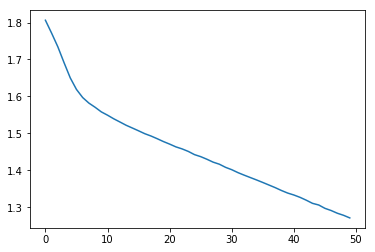

In [15]:
plt.plot(history.history['loss'])
plt.show()

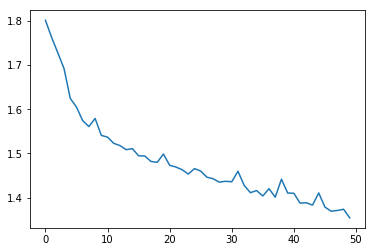

In [16]:
plt.plot(history.history['val_loss'])
plt.show()

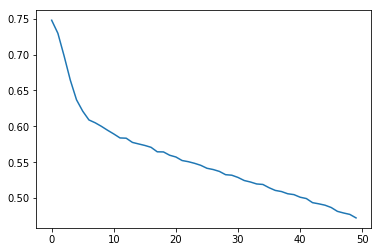

In [17]:
plt.plot(np.ones(len(history.history['acc']))-history.history['acc'])
plt.show()

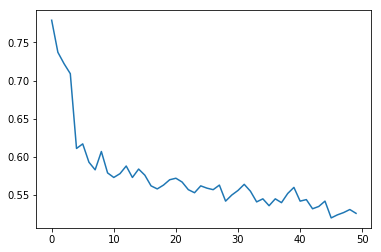

In [18]:
plt.plot(np.ones(len(history.history['val_acc']))-history.history['val_acc'])
plt.show()